In [1]:
# IMPORT POPULAR LIBRARIES
import seaborn as sns
from sklearn import ensemble,linear_model
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
full_table_standings = pd.read_csv('./epl_standings_2000_to_2022.csv')
full_table_standings.tail(20)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
420,2021-22,1,Manchester City,38,29,6,3,99,26,73,93,Qualification for the Champions League group s...
421,2021-22,2,Liverpool,38,28,8,2,94,26,68,92,Qualification for the Champions League group s...
422,2021-22,3,Chelsea,38,21,11,6,76,33,43,74,Qualification for the Champions League group s...
423,2021-22,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,Qualification for the Champions League group s...
424,2021-22,5,Arsenal,38,22,3,13,61,48,13,69,Qualification for the Europa League group stag...
425,2021-22,6,Manchester United,38,16,10,12,57,57,0,58,Qualification for the Europa League group stag...
426,2021-22,7,West Ham United,38,16,8,14,60,51,9,56,Qualification for the Europa Conference League...
427,2021-22,8,Leicester City,38,14,10,14,62,59,3,52,Not Applicable
428,2021-22,9,Brighton & Hove Albion,38,12,15,11,42,44,-2,51,Not Applicable
429,2021-22,10,Wolverhampton Wanderers,38,15,6,17,38,43,-5,51,Not Applicable


In [3]:
full_table_standings.describe().T

,count,mean,std,min,25%,50%,75%,max
Pos,440.0,10.500000,5.772845,1.0,5.75,10.5,15.25,20.0
Pld,440.0,38.000000,0.000000,38.0,38.00,38.0,38.00,38.0
W,440.0,14.261364,5.987638,1.0,10.00,13.0,18.00,32.0
D,440.0,9.477273,2.856385,2.0,7.00,9.0,11.00,17.0
L,440.0,14.261364,5.548080,0.0,10.00,15.0,18.00,29.0
GF,440.0,50.863636,15.778205,20.0,40.00,47.0,60.00,106.0
GA,440.0,50.863636,12.893450,15.0,42.00,51.0,59.00,89.0
GD,440.0,0.000000,26.026270,-69.0,-19.00,-6.0,16.00,79.0
Pts,440.0,52.240909,17.097234,11.0,40.75,48.0,63.25,100.0


In [4]:
first_positions = full_table_standings[full_table_standings['Pos']==1]
first_positions.Team.value_counts()

Manchester United    7
Manchester City      6
Chelsea              5
Arsenal              2
Leicester City       1
Liverpool            1
Name: Team, dtype: int64

from the analysis ,it is shown that manchester united has won the premier league the most amount of times since it's inception i.e 2000

Following in second was manchester city who has won it more in recent years and which our model might be biased towards in its prediction

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Manchester United'),
  Text(1, 0, 'Arsenal'),
  Text(2, 0, 'Chelsea'),
  Text(3, 0, 'Manchester City'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'Liverpool')])

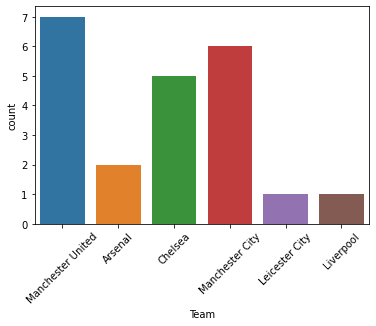

In [5]:
sns.countplot(data  = first_positions, x = 'Team')
plt.xticks(rotation = 45)

In [6]:
champions_league_teams = full_table_standings[full_table_standings['Pos'] < 5]

In [7]:
champions_league_teams.head(10)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
20,2001-02,1,Arsenal,38,26,9,3,79,36,43,87,Qualification for the Champions League first g...
21,2001-02,2,Liverpool,38,24,8,6,67,30,37,80,Qualification for the Champions League first g...
22,2001-02,3,Manchester United,38,24,5,9,87,45,42,77,Qualification for the Champions League third q...
23,2001-02,4,Newcastle United,38,21,8,9,74,52,22,71,Qualification for the Champions League third q...
40,2002-03,1,Manchester United,38,25,8,5,74,34,40,83,Qualification for the Champions League group s...
41,2002-03,2,Arsenal,38,23,9,6,85,42,43,78,Qualification for the Champions League group s...


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Manchester United'),
  Text(1, 0, 'Arsenal'),
  Text(2, 0, 'Liverpool'),
  Text(3, 0, 'Leeds United'),
  Text(4, 0, 'Newcastle United'),
  Text(5, 0, 'Chelsea'),
  Text(6, 0, 'Everton'),
  Text(7, 0, 'Tottenham Hotspur'),
  Text(8, 0, 'Manchester City'),
  Text(9, 0, 'Leicester City')])

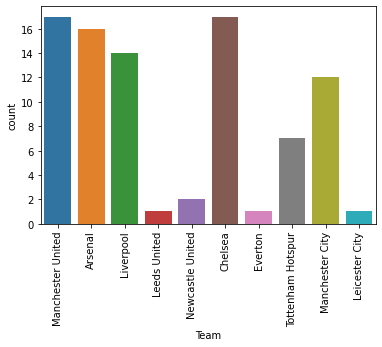

In [8]:
sns.countplot(data  = champions_league_teams, x = 'Team')
plt.xticks(rotation = 90)

In [9]:
champions_league_teams.Team.value_counts()

Manchester United    17
Chelsea              17
Arsenal              16
Liverpool            14
Manchester City      12
Tottenham Hotspur     7
Newcastle United      2
Leeds United          1
Everton               1
Leicester City        1
Name: Team, dtype: int64

_Manchester United and Chelsea are both tied at 17 times each and are the highest attendees of the champions league in the Premier League_

In [10]:
mancity = full_table_standings[full_table_standings['Team']=='Manchester City']

In [11]:
mancity.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
17,2000-01,18,Manchester City,38,8,10,20,41,65,-24,34,Relegation to the Football League First Division
48,2002-03,9,Manchester City,38,15,6,17,47,54,-7,51,Qualification for the UEFA Cup qualifying roun...
75,2003-04,16,Manchester City,38,9,14,15,55,54,1,41,Not Applicable
87,2004-05,8,Manchester City,38,13,13,12,47,39,8,52,Not Applicable
114,2005-06,15,Manchester City,38,13,4,21,43,48,-5,43,Not Applicable


In [12]:
mancity.shape

(21, 12)

Man City Appeared in all 21 seasons since the premier league started. Let's check their dominance and see how many of these 21 they have won

In [13]:
mancity[mancity['Pos']==1]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
220,2011-12,1,Manchester City,38,28,5,5,93,29,64,89,Qualification for the Champions League group s...
260,2013-14,1,Manchester City,38,27,5,6,102,37,65,86,Qualification for the Champions League group s...
340,2017-18,1,Manchester City,38,32,4,2,106,27,79,100,Qualification for the Champions League group s...
360,2018-19,1,Manchester City,38,32,2,4,95,23,72,98,Qualification for the Champions League group s...
400,2020-21,1,Manchester City,38,27,5,6,83,32,51,86,Qualification for the Champions League group s...
420,2021-22,1,Manchester City,38,29,6,3,99,26,73,93,Qualification for the Champions League group s...


In [14]:
mancity.GF.sum()

1478

In [15]:
mancity.GA.sum()

846

In the premier league they scored a total of 1478 goals and conceded a total of 846 goals

In [16]:
GOAL_RATIO = mancity.GF.sum()/mancity.Pld.sum()

In [17]:
GOAL_RATIO.round(2)

1.85

In the history of the premier league , they have a goal scored per-match ratio of 1.85, which is super-impressive

## building a predictive model 

In [18]:
full_table_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [19]:
training_data = full_table_standings[full_table_standings['Season'].isin(['2021-22','2020-21','2019-20'])]

In [20]:
training_data.head(10)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
380,2019-20,1,Liverpool,38,32,3,3,85,33,52,99,Qualification for the Champions League group s...
381,2019-20,2,Manchester City,38,26,3,9,102,35,67,81,Qualification for the Champions League group s...
382,2019-20,3,Manchester United,38,18,12,8,66,36,30,66,Qualification for the Champions League group s...
383,2019-20,4,Chelsea,38,20,6,12,69,54,15,66,Qualification for the Champions League group s...
384,2019-20,5,Leicester City,38,18,8,12,67,41,26,62,Qualification for the Europa League group stage
385,2019-20,6,Tottenham Hotspur,38,16,11,11,61,47,14,59,Qualification for the Europa League second qua...
386,2019-20,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59,Not Applicable
387,2019-20,8,Arsenal,38,14,14,10,56,48,8,56,Qualification for the Europa League group stag...
388,2019-20,9,Sheffield United,38,14,12,12,39,39,0,54,Not Applicable
389,2019-20,10,Burnley,38,15,9,14,43,50,-7,54,Not Applicable


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
training_data[['Season', 'Qualification or relegation']] = training_data[['Season', 'Qualification or relegation']].apply(le.fit_transform)

In [23]:
training_data.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
380,0,1,Liverpool,38,32,3,3,85,33,52,99,1
381,0,2,Manchester City,38,26,3,9,102,35,67,81,1
382,0,3,Manchester United,38,18,12,8,66,36,30,66,1
383,0,4,Chelsea,38,20,6,12,69,54,15,66,1
384,0,5,Leicester City,38,18,8,12,67,41,26,62,4


In [24]:
training_data.drop('Qualification or relegation', axis = 1, inplace = True)

In [25]:
training_data.shape

(60, 11)

In [26]:
training_data.Team.value_counts()

Liverpool                  3
Burnley                    3
Aston Villa                3
West Ham United            3
Brighton & Hove Albion     3
Crystal Palace             3
Manchester City            3
Everton                    3
Southampton                3
Newcastle United           3
Arsenal                    3
Wolverhampton Wanderers    3
Tottenham Hotspur          3
Leicester City             3
Chelsea                    3
Manchester United          3
Sheffield United           2
Watford                    2
Norwich City               2
Leeds United               2
Bournemouth                1
Fulham                     1
West Bromwich Albion       1
Brentford                  1
Name: Team, dtype: int64

Some teams were relegated and promoted over the course of these past 3 Years, So we have no choice but to exempt them from our predictions

In [27]:
count_freq = dict(training_data['Team'].value_counts())
training_data['count_freq'] = training_data['Team']
training_data['count_freq'] = training_data['count_freq'].map(count_freq)


In [28]:
training_data.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,count_freq
380,0,1,Liverpool,38,32,3,3,85,33,52,99,3
381,0,2,Manchester City,38,26,3,9,102,35,67,81,3
382,0,3,Manchester United,38,18,12,8,66,36,30,66,3
383,0,4,Chelsea,38,20,6,12,69,54,15,66,3
384,0,5,Leicester City,38,18,8,12,67,41,26,62,3


In [29]:
training_data = training_data[training_data['count_freq']==3]

In [30]:
training_data.shape

(48, 12)

In [31]:
training_data.Team.unique()

array(['Liverpool', 'Manchester City', 'Manchester United', 'Chelsea',
       'Leicester City', 'Tottenham Hotspur', 'Wolverhampton Wanderers',
       'Arsenal', 'Burnley', 'Southampton', 'Everton', 'Newcastle United',
       'Crystal Palace', 'Brighton & Hove Albion', 'West Ham United',
       'Aston Villa'], dtype=object)

Only these 16 teams have been consistent in the premier league over these past **3** seasons and have not been relegated

In [32]:
# training_data.reset_index(level = 0 , drop = True)
training_data = training_data.drop('count_freq', axis = 1)
training_data.head(20)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
380,0,1,Liverpool,38,32,3,3,85,33,52,99
381,0,2,Manchester City,38,26,3,9,102,35,67,81
382,0,3,Manchester United,38,18,12,8,66,36,30,66
383,0,4,Chelsea,38,20,6,12,69,54,15,66
384,0,5,Leicester City,38,18,8,12,67,41,26,62
385,0,6,Tottenham Hotspur,38,16,11,11,61,47,14,59
386,0,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59
387,0,8,Arsenal,38,14,14,10,56,48,8,56
389,0,10,Burnley,38,15,9,14,43,50,-7,54
390,0,11,Southampton,38,15,7,16,51,60,-9,52


In [33]:
from sklearn import metrics

X = training_data.drop(['Pos','Team'], axis = 1)
y = training_data.Pos

test_data = training_data[training_data['Season']==2]
test_data = test_data.drop(['Pos','Team'], axis = 1)
# the test data will use values from the very last season to see the consistency of our model
test_validation_label = training_data[training_data['Season']==2].Pos




In [34]:
model1 = ensemble.HistGradientBoostingRegressor()
model2 = ensemble.RandomForestRegressor()
model3 = linear_model.LinearRegression()
model4 = linear_model.Ridge()

model = ensemble.VotingRegressor([('a', model1),('b', model2),('c', model3),('d', model4)])
model.fit(X,y)

# print(model.score(test_data,test_validation_label))
y_pred = model.predict(test_data)

# check validation performance
metrics.r2_score(test_validation_label,y_pred)

0.9448945549066209

In [35]:
print(y_pred)

[ 0.0773741   0.21403343  3.10910711  4.46400787  5.77311813  7.24706926
  8.11423196  9.33432136 10.24388312 11.5201528  12.09062885 10.94280551
 13.53516125 14.16064424 15.19161886 15.69243131]


In [36]:
results = pd.DataFrame({
    'Team': training_data[training_data['Season']==2].Team,
    'odds': y_pred
})

In [37]:
results.head(20)

,Team,odds
420,Manchester City,0.077374
421,Liverpool,0.214033
422,Chelsea,3.109107
423,Tottenham Hotspur,4.464008
424,Arsenal,5.773118
425,Manchester United,7.247069
426,West Ham United,8.114232
427,Leicester City,9.334321
428,Brighton & Hove Albion,10.243883
429,Wolverhampton Wanderers,11.520153


> # We could use the predicted Pos Values  as odds that represent the chances of each of those teams winnings the league in future seasons i.e This current 2022-23 season